In [1]:
import pandas as pd
import numpy as np

In [62]:
dt = pd.read_excel('sheet1.xlsx', sheet_name='Pylum-level microbiota')
print(dt.head())

   Sample ID  Firmicutes  Proteobacteria  Actinobacteria  Tenericutes  \
0  UAB 17001     52.7866         22.8393         17.7473       0.0325   
1  UAB 17002     26.8138         55.7956          1.8540       0.0040   
2  UAB 17003     60.5104          8.7647          5.1275       0.0060   
3  UAB 17004     29.1573          7.5317          9.0231       0.0746   
4  UAB 17005     76.8142          4.7258         11.9876       0.0407   

   Bacteroidetes  Armatimonadetes  Spirochaetes  Planctomycetes  \
0         3.2061           0.0260        0.0195          0.0065   
1         0.0161           0.0121        0.0000          0.0020   
2        23.6522           0.0424        0.0089          0.0201   
3         1.0440           0.0000        0.0746          0.0000   
4         2.1745           0.0204        0.1375          0.0000   

   Verrucomicrobia  ...  Deferribacteres  Dictyoglomi  Balneolaeota  \
0           0.0000  ...           0.0000       0.0000           0.0   
1           0.00

We discard some not interesting data.

In [65]:
# add a new column that is equals to 1 if the Sample ID starts with U and 0 otherwise
dt['Infertile'] = dt['Sample ID'].str.startswith('U').astype(int)
#randomize the order of the rows
dt = dt.sample(frac=1).reset_index(drop=True)
#save the new file
dt.to_excel('sheet1_preprocessed.xlsx')

dt.head()

,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,...,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,Infertile
0,UAB 18020,53.4006,15.7427,1.4199,0.0117,27.5289,0.1681,0.0846,0.0496,0.0000,...,0.0097,0.001,0.0,0.0019,0.0010,0.0,0.0,0.0000,0.0029,1
1,CON 02,70.9169,8.3693,15.3492,0.0167,0.6654,0.0167,0.0377,0.0042,0.0000,...,0.0000,0.000,0.0,0.0084,0.0000,0.0,0.0,0.0000,0.0000,0
2,UAB 18019,72.4873,17.8601,7.1422,0.0019,0.5271,0.0150,0.1477,0.0000,0.0019,...,0.0000,0.000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,1
3,CON 14,17.3937,61.7182,5.1900,11.5383,3.0066,0.0000,0.0049,0.0000,0.0000,...,0.0000,0.000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0
4,UAB 17006,74.4002,10.1792,13.0713,0.0112,0.2280,0.0273,0.0273,0.0048,0.0000,...,0.0000,0.000,0.0,0.0000,0.1076,0.0,0.0,0.0032,0.0000,1


In [66]:
dt.describe()

,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,Verrucomicrobia,Chloroflexi,...,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,Infertile
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000,56.000000,56.000000
mean,58.664130,19.061948,8.003034,2.249039,5.340596,0.036091,0.069654,0.017595,0.001879,0.003155,...,0.002737,0.000366,0.000207,0.002404,0.009216,0.000214,0.00023,0.000273,0.000293,0.750000
std,18.581490,14.796855,6.502343,7.074382,7.852858,0.044794,0.099641,0.030955,0.009969,0.004089,...,0.004588,0.001022,0.000517,0.007426,0.053317,0.000918,0.00076,0.001299,0.000723,0.436931
min,8.419600,0.747200,0.178500,0.000000,0.016100,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,50.852225,8.650550,3.138875,0.006975,0.396575,0.008625,0.006050,0.001825,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.750000
50%,62.216850,15.537350,5.759550,0.013350,2.223050,0.022700,0.034850,0.005700,0.000000,0.001600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,72.644350,27.127925,11.545400,0.034550,6.145375,0.048775,0.093600,0.017225,0.000725,0.004750,...,0.004125,0.000000,0.000000,0.001225,0.000350,0.000000,0.00000,0.000000,0.000000,1.000000
max,88.632700,61.718200,33.209900,36.628700,27.528900,0.239800,0.450600,0.136900,0.074600,0.017700,...,0.017900,0.006000,0.002100,0.040700,0.386600,0.005800,0.00510,0.009200,0.002900,1.000000


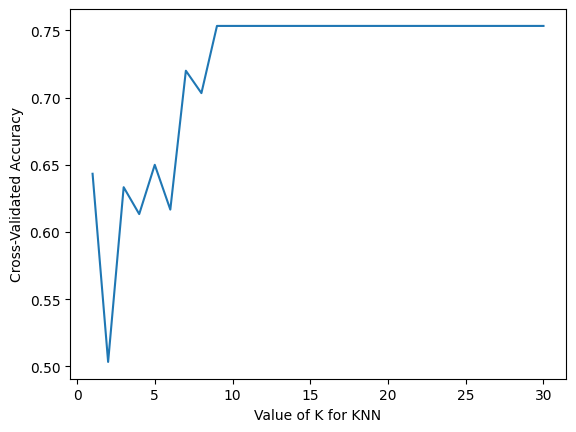

In [69]:
# use KNN to predict the infertile status of the samples
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data into training and testing sets
X = dt.drop(['Sample ID', 'Infertile'], axis=1)
y = dt['Infertile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use cross-validation to find the best value of k
from sklearn.model_selection import cross_val_score
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 10-fold cross-validation
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [70]:
# use the best value of k to train the model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
y_pred = knn.predict(X)
print(accuracy_score(y, y_pred))


0.75


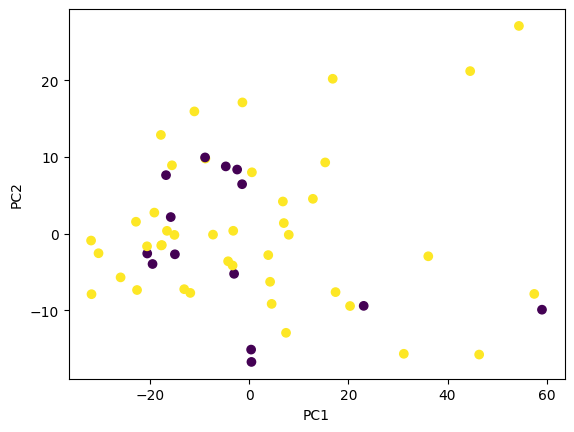

In [71]:
# generate principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)

# plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


<BarContainer object of 5 artists>

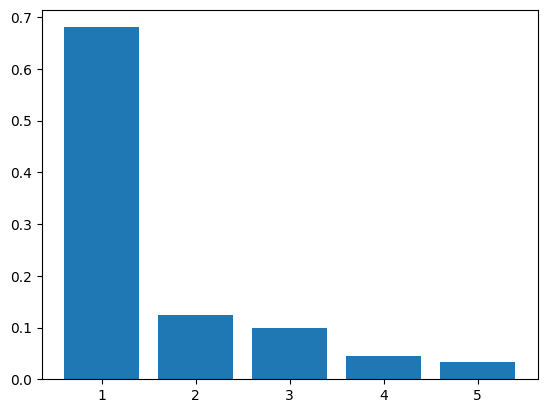

In [73]:
# plot the variance of first principal components
pca.explained_variance_ratio_

plt.bar(range(1, 6), pca.explained_variance_ratio_)


In [74]:
# combine the first two principal components with the infertile status

dt_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
dt_pca['Infertile'] = y
dt_pca.head()


,PC1,PC2,PC3,PC4,PC5,Infertile
0,0.543560,7.989795,22.105458,2.516587,-4.789544,1
1,-15.823384,2.153804,-8.681804,4.088661,0.017816,0
2,-11.882342,-7.735235,-4.462442,-0.938789,-1.450349,1
3,59.049967,-9.923825,2.517317,-2.987732,-4.897414,0
4,-17.621615,-1.494785,-8.153537,2.305384,-0.784840,1


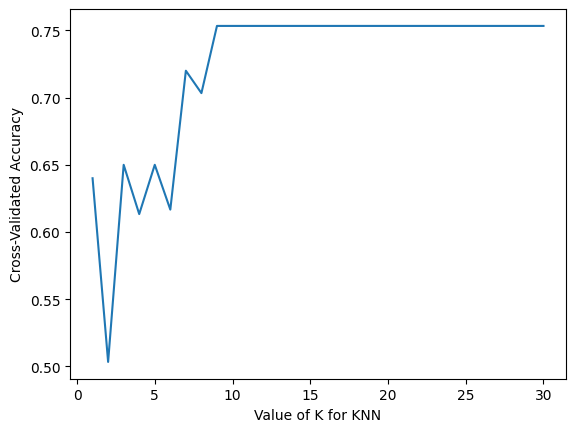

In [75]:
# combine PC1 and PC2 with KNN with k=10
X_knn_pca = dt_pca.drop('Infertile', axis=1)
y_knn_pca = dt_pca['Infertile']

# use cross-validation to find the best value of k
from sklearn.model_selection import cross_val_score
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 10-fold cross-validation
    scores = cross_val_score(knn, X_knn_pca, y_knn_pca, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
K = 9
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_knn_pca, y_knn_pca)
y_pred = knn.predict(X_knn_pca)
print(accuracy_score(y_knn_pca, y_pred))


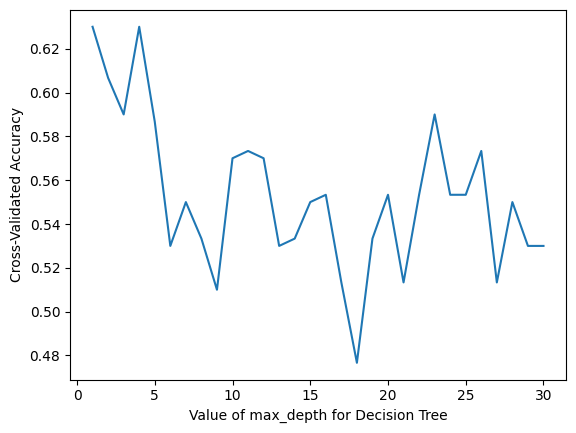

In [55]:
# Generate a tree to predict the infertile status

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# use cross-validation to find the best value of max_depth
max_depth_range = range(1, 31)
max_depth_scores = []
for d in max_depth_range:
    dt = DecisionTreeClassifier(max_depth=d)
    # 10-fold cross-validation
    scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
    max_depth_scores.append(scores.mean())

import matplotlib.pyplot as plt

plt.plot(max_depth_range, max_depth_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

    

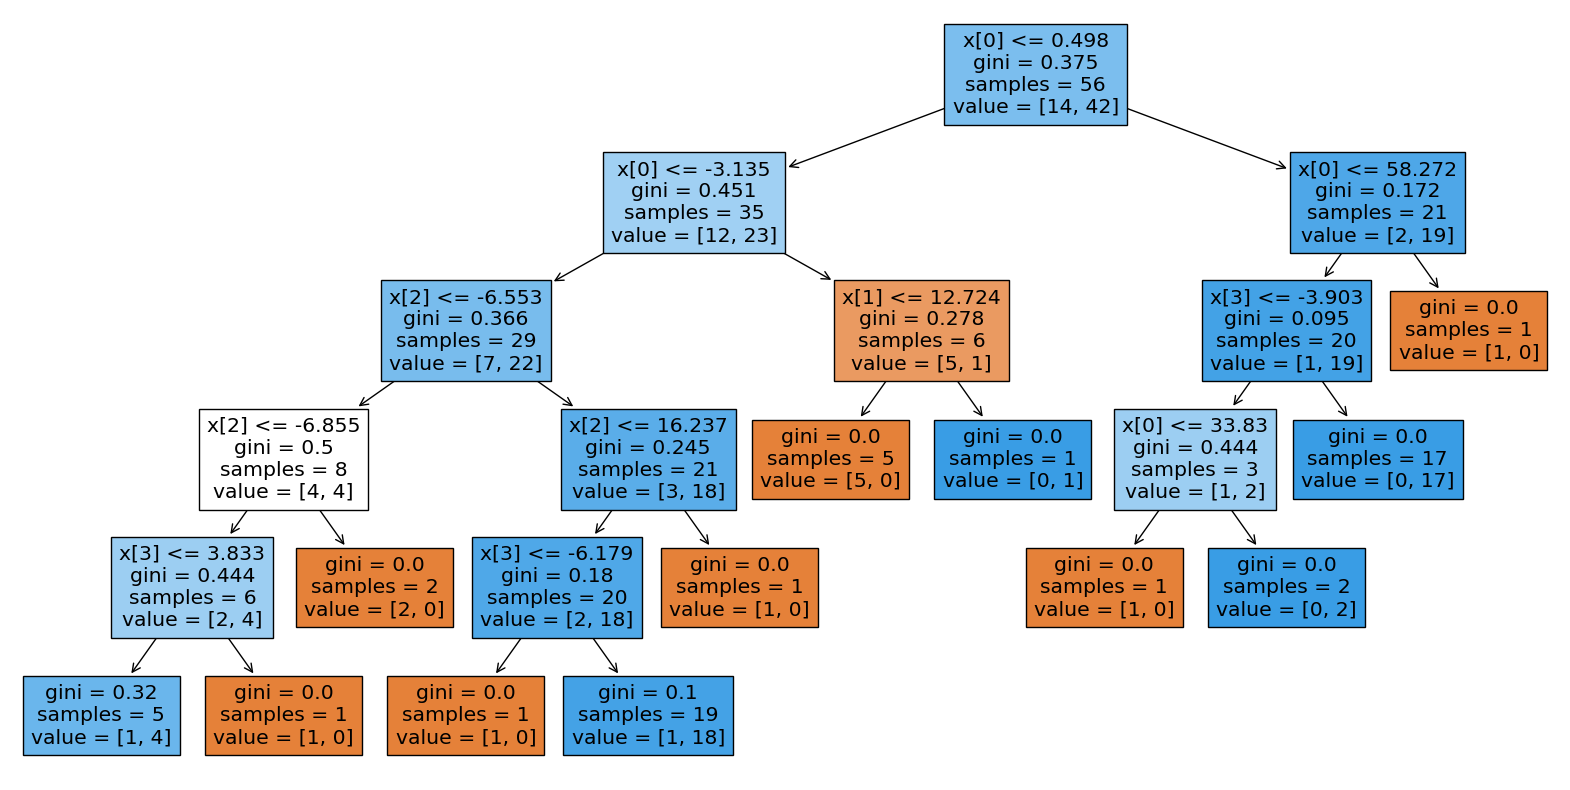

In [56]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X, y)

# plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True)

plt.show()

In [57]:
# bayesan classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)
print(accuracy_score(y, y_pred))



0.7678571428571429
